# Twitter

In [21]:
import tweepy
from pprint import pprint
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 15)

## credenciais:

acesse: https://apps.twitter.com/

In [2]:
confs = {
  "consumer_key"        : "",
  "consumer_secret"     : "",
  "access_token"        : "",
  "access_token_secret" : ""
}

## login

In [4]:
auth = tweepy.OAuthHandler(confs["consumer_key"], confs["consumer_secret"])
auth.set_access_token(confs["access_token"], confs["access_token_secret"])
twitter = tweepy.API(auth)

## conhecendo a API

### * buscas

In [7]:
qnt_results = 50
results = twitter.search("#python", count=qnt_results)

### * perfis

In [18]:
one_result = results[0]
pprint(one_result._json)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Jun 02 18:14:49 +0000 2018',
 'entities': {'hashtags': [{'indices': [32, 47], 'text': 'Classification'},
                           {'indices': [63, 70], 'text': 'Python'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 555031989,
                                 'id_str': '555031989',
                                 'indices': [3, 18],
                                 'name': 'Ronald van Loon',
                                 'screen_name': 'Ronald_vanLoon'},
                                {'id': 941316421,
                                 'id_str': '941316421',
                                 'indices': [79, 90],
                                 'name': 'Ahmet Taspinar',
                                 'screen_name': 'ataspinar2'},
                                {'id': 393033324,
                                 'id_str': '393033324',
                                

### * tweets

In [22]:
user_timeline = twitter.user_timeline( one_result.author.id)
for t in user_timeline:
    print(t.text)
    print('-' * 50)

RT @Ronald_vanLoon: Naive Bayes #Classification explained with #Python code
by @ataspinar2 @DataScienceCtrl |

Read more here: https://t.co…
--------------------------------------------------
RT @AnsonMcCade: Here are some of the most in demand #programming languages for 2018. Which do you know?

Read more here: https://t.co/7hBi…
--------------------------------------------------
RT @django_develop: An introduction to algorithms in Python

☞ https://t.co/9lUqL2DyCD

#python #programming https://t.co/vcDfYEQksB
--------------------------------------------------
RT @TheWPTheme: Download WordPress Theme - Online Casino Template 251 https://t.co/joI2dvPGfZ #WordPress #Theme
--------------------------------------------------
RT @TheMaxamillion: Friday afternoon Python Debugging Pro Tip: Drop this anywhere in your code you want to see how the code path got there…
--------------------------------------------------
RT @johnshea63: Also from today’s @BBCRadio3 Through the Night scriptwriting f

### * grafos

In [6]:
G = nx.read_yaml("datasets/graph_twitter.yaml")

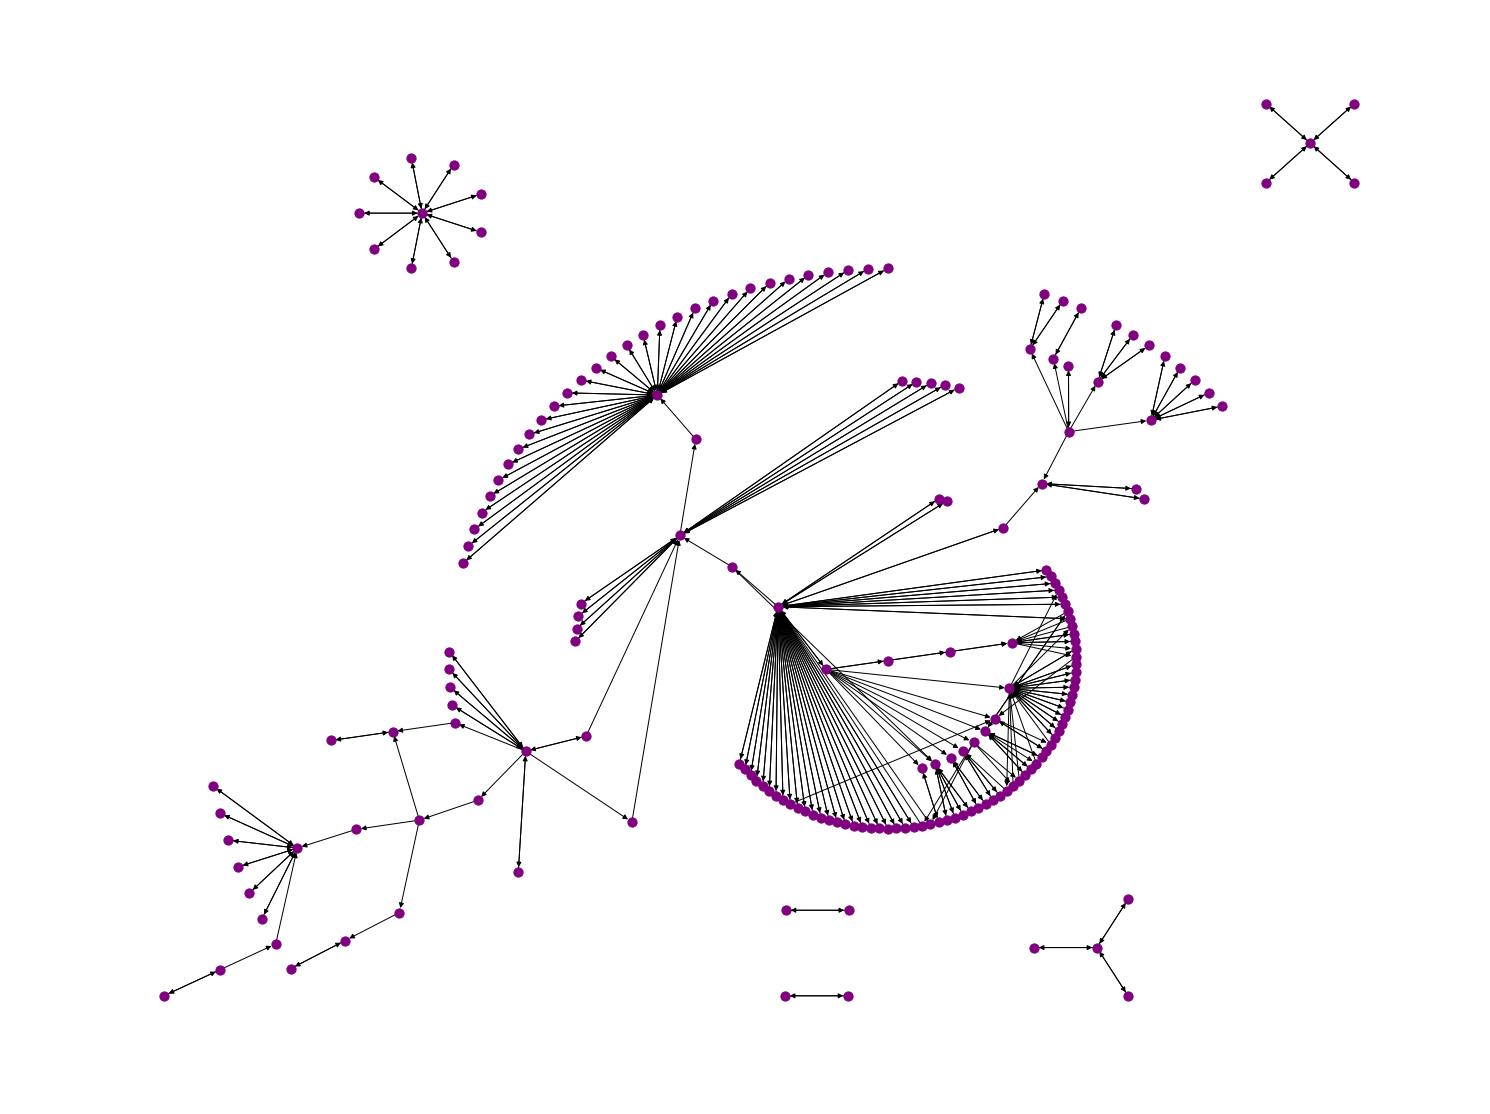

In [65]:
pos = nx.drawing.nx_agraph.graphviz_layout(G, prog="twopi") # pos= neato, twopi, circo, dot
nx.draw(G, pos, node_size=85, node_color="purple")

### * centralidade

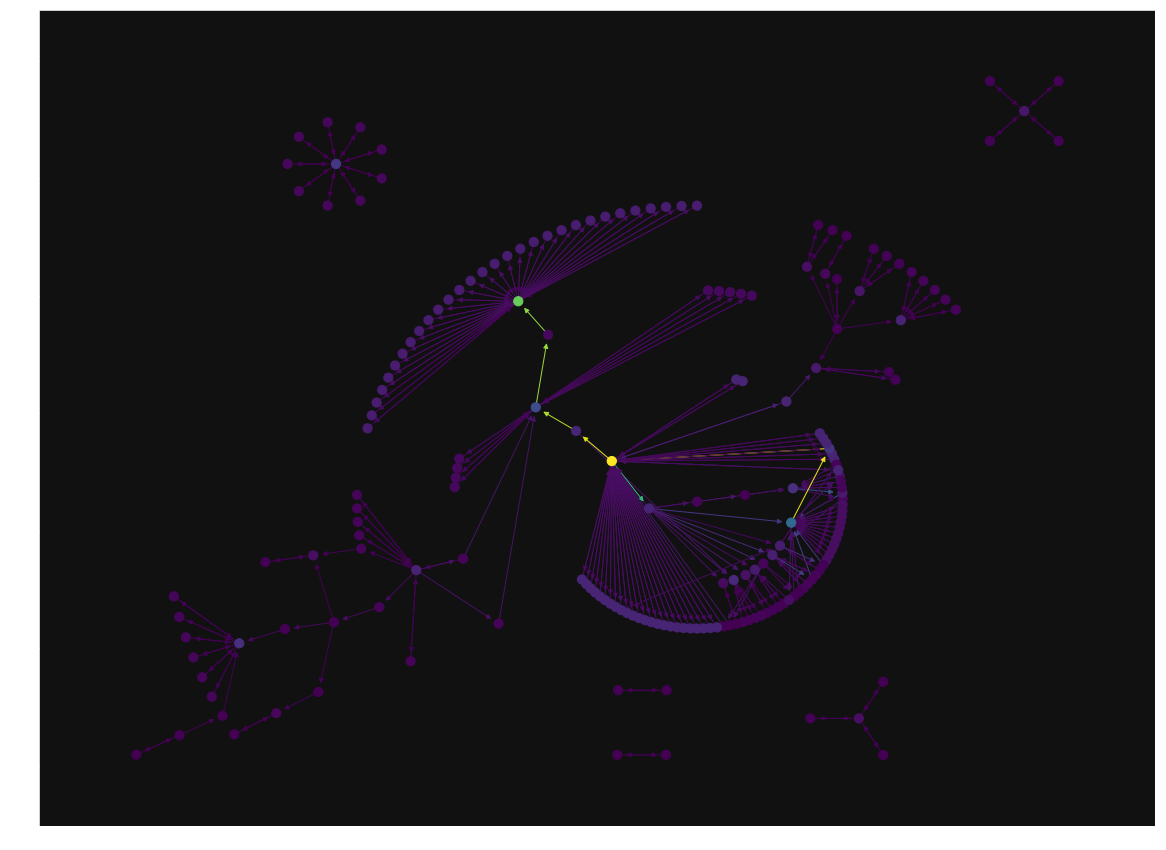

In [67]:
rank = nx.centrality.katz_centrality(G).values()
edge_rank = nx.centrality.edge_betweenness_centrality(G).values()
nx.draw_networkx_edges(G, pos,  edge_color=list(edge_rank), cmap=plt.cm.viridis_r)
nx.draw_networkx_nodes(G, pos, node_size=85, node_color=list(rank), cmap=plt.cm.viridis)
